[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/y-akbal/Some-Usefull-Machine-Learning-Stuff/blob/main/HW/Lecture_Notes/W8.ipynb)

In [ ]:
import requests
import shutil
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
url = "https://i0.wp.com/vaguevisages.com/wp-content/uploads/2017/07/stalker-movie-tarkovsky-four.jpg?w=1600&ssl=1"
response = requests.get(url, stream=True)
with open('img.png', 'wb') as out_file:
    shutil.copyfileobj(response.raw, out_file)
del response

In [ ]:
image = Image.open("img.png")

In [ ]:
number = np.number(image)

In [ ]:
number.shape

(900, 1600, 3)

In [ ]:
number = np.number(image)

In [ ]:
import scipy

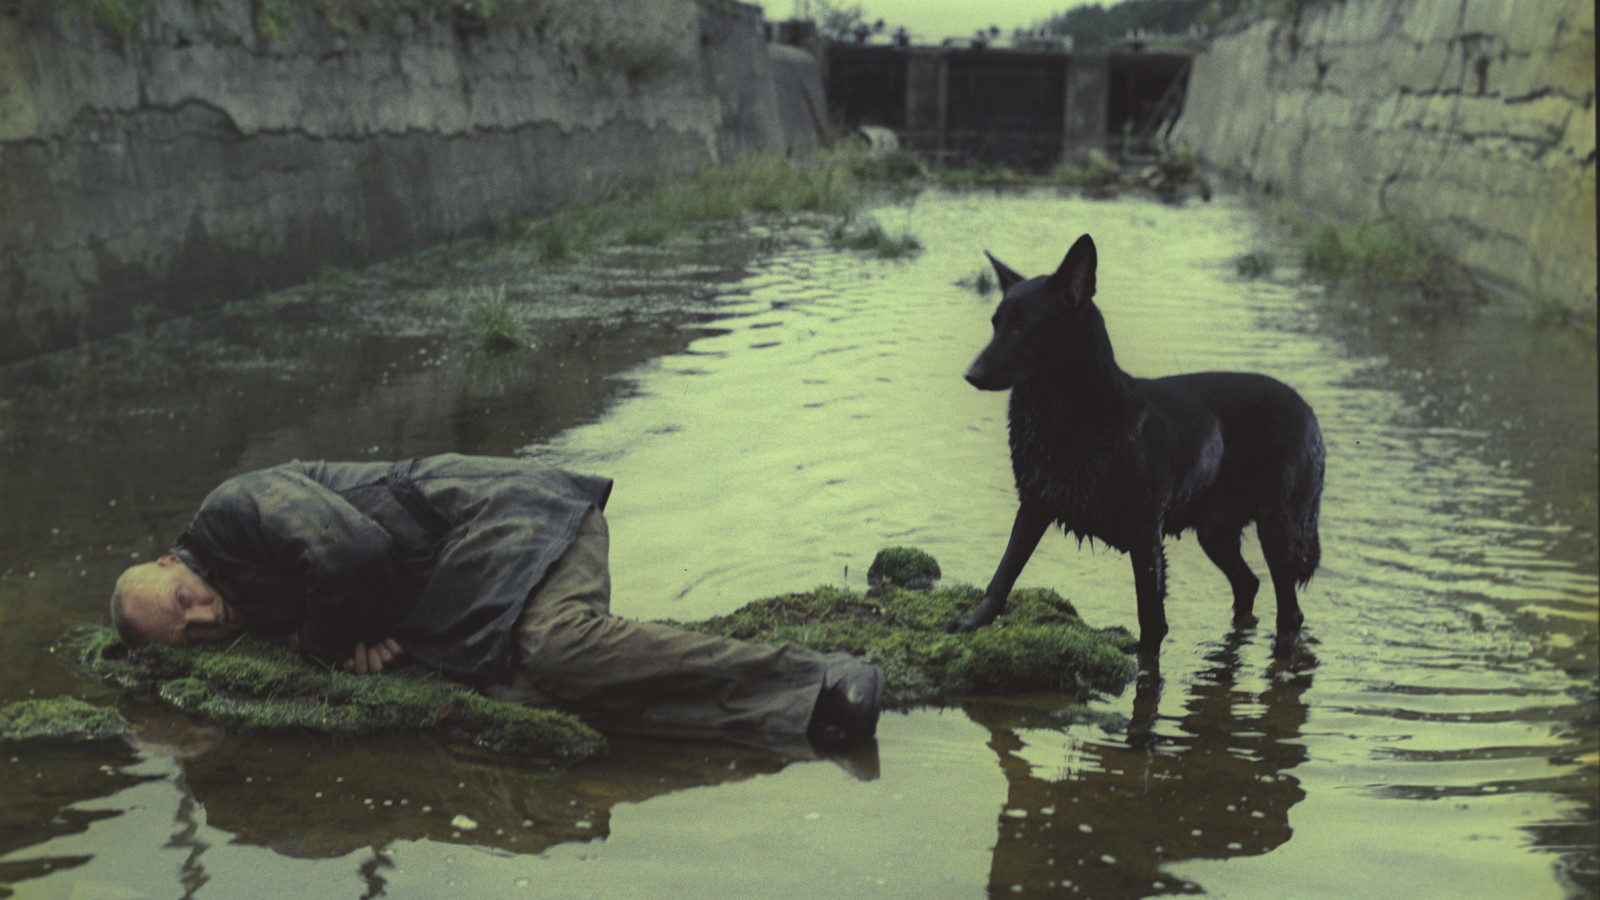

In [ ]:
image 
# A scene from CTALKER by Andrei Tarkovsky

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, BatchNormalization, Flatten, Dropout, RandomFlip, RandomRotation
from tensorflow.keras.activations import relu
from tensorflow.keras.models import Model, Sequential


In [ ]:
class block(Model):
  def __init__(self):
    super().__init__()
    self.conv = Conv2D(10, 3, padding = "same")
    self.max_pool = MaxPooling2D()
    self.norm = BatchNormalization()
  def call(self, x, training = None):
    x = self.conv(x)
    x = self.max_pool(x)
    x = self.norm(x, training)
    return x
  

In [ ]:
block_ = block()

In [ ]:
data_augmentation = tf.keras.Sequential([
  RandomFlip("horizontal_and_vertical"),
 RandomRotation(0.2),
])
model = Sequential([data_augmentation,
    block(),
          block(),
          block(),
           block(),
          Flatten(),
          Dropout(0.6), ## one method!!!!
          Dense(128, activation = "relu"),

          Dense(10, activation = "softmax")])


In [ ]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train/255.0
X_train = np.expand_dims(X_train, -1)
X_test = X_test/255.0
X_test = np.expand_dims(X_test, -1)


In [ ]:
model.compile(optimizer= "adam", loss= "sparse_categorical_crossentropy", metrics = "accuracy")
hist = model.fit(X_train, y_train, batch_size = 32, epochs = 35, validation_data=[X_test, y_test]) 

Epoch 1/35
1875/1875 [==============================] - 17s 7ms/step - loss: 1.7265 - accuracy: 0.3599 - val_loss: 1.1851 - val_accuracy: 0.5723
Epoch 2/35
1875/1875 [==============================] - 13s 7ms/step - loss: 1.4515 - accuracy: 0.4696 - val_loss: 1.3236 - val_accuracy: 0.5025
Epoch 3/35
1875/1875 [==============================] - 13s 7ms/step - loss: 1.3375 - accuracy: 0.5143 - val_loss: 0.9645 - val_accuracy: 0.6789
Epoch 4/35
1875/1875 [==============================] - 13s 7ms/step - loss: 1.2822 - accuracy: 0.5298 - val_loss: 1.0110 - val_accuracy: 0.6506
Epoch 5/35
1875/1875 [==============================] - 13s 7ms/step - loss: 1.2416 - accuracy: 0.5448 - val_loss: 1.0257 - val_accuracy: 0.6349
Epoch 6/35
1875/1875 [==============================] - 12s 6ms/step - loss: 1.2211 - accuracy: 0.5515 - val_loss: 0.9922 - val_accuracy: 0.6346
Epoch 7/35
1875/1875 [==============================] - 13s 7ms/step - loss: 1.1878 - accuracy: 0.5654 - val_loss: 0.9819 - val_ac

In [ ]:
from matplotlib import pyplot as plt

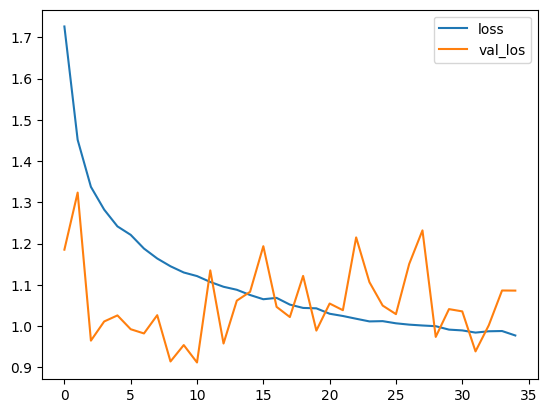

In [ ]:
plt.plot(hist.history["loss"], label = "loss")
plt.plot(hist.history["val_loss"], label = "val_los")
plt.legend()
plt.show()